## EDA and Prediction of US Accidents

## Team: Jayatha Chandra, Avanti Dorle, Lavina Omprakash Talreja, Mansi Pravin Thanki

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [3]:
modeling_data = pd.read_csv("modeling_data.csv", na_values='')
display(modeling_data.head())

,Unnamed: 0,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance.mi.,Temperature.F.,Wind_Chill.F.,Humidity,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,High,40.108910,-83.092860,40.112060,-83.031870,3.230,42.1,36.100000,58.0,...,1,1,1,1,1,1,0,0,0,0
1,2,Low,39.865420,-84.062800,39.865010,-84.048730,0.747,36.9,59.658231,91.0,...,1,1,1,1,1,1,0,0,0,0
2,3,Low,39.102660,-84.524680,39.102090,-84.523960,0.055,36.0,59.658231,97.0,...,1,1,1,1,1,1,0,0,0,1
3,4,Low,41.062130,-81.537840,41.062170,-81.535470,0.123,39.0,59.658231,55.0,...,1,1,1,1,1,1,0,0,1,1
4,5,High,39.172393,-84.492792,39.170476,-84.501798,0.500,37.0,29.800000,93.0,...,1,1,1,1,1,1,1,1,1,1


In [4]:
modeling_data.columns

Index(['Unnamed: 0', 'Severity', 'Start_Lat', 'Start_Lng', 'End_Lat',
       'End_Lng', 'Distance.mi.', 'Temperature.F.', 'Wind_Chill.F.',
       'Humidity', 'Pressure', 'Visibility', 'Wind_Direction', 'Wind_Speed',
       'Precipitation', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
modeling_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 33 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   Severity               object 
 2   Start_Lat              float64
 3   Start_Lng              float64
 4   End_Lat                float64
 5   End_Lng                float64
 6   Distance.mi.           float64
 7   Temperature.F.         float64
 8   Wind_Chill.F.          float64
 9   Humidity               float64
 10  Pressure               float64
 11  Visibility             float64
 12  Wind_Direction         int64  
 13  Wind_Speed             float64
 14  Precipitation          float64
 15  Weather_Condition      int64  
 16  Amenity                int64  
 17  Bump                   int64  
 18  Crossing               int64  
 19  Give_Way               int64  
 20  Junction               int64  
 21  No_Exit                int64  
 22  Railway           

In [6]:
modeling_data.dropna(axis=0)
modeling_data.isna().sum()


Unnamed: 0               0
Severity                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance.mi.             0
Temperature.F.           0
Wind_Chill.F.            0
Humidity                 0
Pressure                 0
Visibility               0
Wind_Direction           0
Wind_Speed               0
Precipitation            0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Separate features and target variable
X = modeling_data.drop('Severity', axis=1)
y = modeling_data['Severity']

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_test = rf_clf.predict(X_test)

# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy:", accuracy)



Accuracy: 0.9360218180923578


In [11]:
# Calculate accuracy, precision, recall, and F1-score on testing set
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy:",accuracy_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:\n", cm)

# calculate classification report
cr = classification_report(y_test, y_pred_test)
print("Classification Report:\n", cr)


Accuracy: 0.9360218180923578
Confusion Matrix:
 [[ 31232  25888]
 [ 10520 501429]]
Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.55      0.63     57120
         Low       0.95      0.98      0.96    511949

    accuracy                           0.94    569069
   macro avg       0.85      0.76      0.80    569069
weighted avg       0.93      0.94      0.93    569069



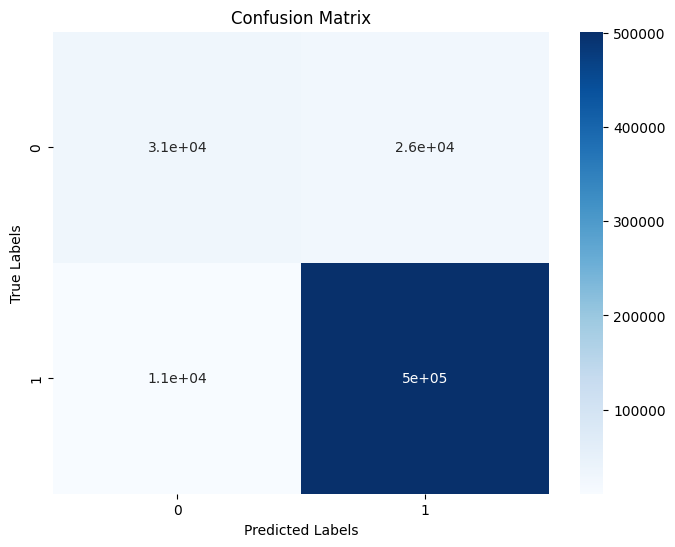

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# create heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [13]:
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy:",accuracy_test)

# calculate classification report
cr = classification_report(y_test, y_pred_test)
print("Classification Report:\n", cr)

# calculate macro-average precision, recall, and F1 score
macro_prec = precision_score(y_test, y_pred_test, average='macro')
macro_rec = recall_score(y_test, y_pred_test, average='macro')
macro_f1 = f1_score(y_test, y_pred_test, average='macro')
print("Macro-average Precision:", macro_prec)
print("Macro-average Recall:", macro_rec)
print("Macro-average F1 Score:", macro_f1)

Accuracy: 0.9360218180923578
Classification Report:
               precision    recall  f1-score   support

        High       0.75      0.55      0.63     57120
         Low       0.95      0.98      0.96    511949

    accuracy                           0.94    569069
   macro avg       0.85      0.76      0.80    569069
weighted avg       0.93      0.94      0.93    569069

Macro-average Precision: 0.8494711066895253
Macro-average Recall: 0.7631148948096649
Macro-average F1 Score: 0.7983669535132445


In [14]:
rfc_scores = [accuracy_test, macro_prec, macro_rec, macro_f1]


In [15]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the data into a Pandas DataFrame
data = pd.read_csv('modeling_data.csv')

# Separate the features and target variable
X = data.drop(['Severity'], axis=1)
y = data['Severity']

# Undersample the majority class
rus = RandomUnderSampler(sampling_strategy=0.4)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Set up the hyperparameter grid
hyperparameters = {
    'C': [0.001],
    'penalty': ['l2', 'none'],
    'solver': ['lbfgs','newton-cg']
}

# Perform grid search with cross-validation to find the best hyperparameters
model = LogisticRegression(max_iter=3000)
grid_search = GridSearchCV(model, hyperparameters, cv=5, n_jobs=-1, scoring='f1')
grid_search.fit(X_train_scaled, y_train)

# Make predictions on the testing data using the best model
y_pred = grid_search.predict(X_test_scaled)

# Evaluate the performance of the model using metrics such as accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='High')
recall = recall_score(y_test, y_pred, pos_label='High')
f1 = f1_score(y_test, y_pred, pos_label='High')

print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best hyperparameters: {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.7497068494927872
Precision: 0.6437644116152734
Recall: 0.2863799158524288
F1 score: 0.39641417483905905


In [16]:
# Calculate accuracy, precision, recall, and F1-score on testing set
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy_test)

# calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# calculate classification report
cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# calculate macro-average precision, recall, and F1 score
macro_prec = precision_score(y_test, y_pred, average='macro')
macro_rec = recall_score(y_test, y_pred, average='macro')
macro_f1 = f1_score(y_test, y_pred, average='macro')
print("Macro-average Precision:", macro_prec)
print("Macro-average Recall:", macro_rec)
print("Macro-average F1 Score:", macro_f1)

# calculate micro-average precision, recall, and F1 score
micro_prec = precision_score(y_test, y_pred, average='micro')
micro_rec = recall_score(y_test, y_pred, average='micro')
micro_f1 = f1_score(y_test, y_pred, average='micro')
print("Micro-average Precision:", micro_prec)
print("Micro-average Recall:", micro_rec)
print("Micro-average F1 Score:", micro_f1)


Accuracy: 0.7497068494927872
Confusion Matrix:
 [[ 16472  41046]
 [  9115 133776]]
Classification Report:
               precision    recall  f1-score   support

        High       0.64      0.29      0.40     57518
         Low       0.77      0.94      0.84    142891

    accuracy                           0.75    200409
   macro avg       0.70      0.61      0.62    200409
weighted avg       0.73      0.75      0.71    200409

Macro-average Precision: 0.7044885139381923
Macro-average Recall: 0.6112950170272075
Macro-average F1 Score: 0.619266345303217
Micro-average Precision: 0.7497068494927872
Micro-average Recall: 0.7497068494927872
Micro-average F1 Score: 0.7497068494927872


In [17]:
logistic_scores = [accuracy_test, macro_prec, macro_rec, macro_f1]

In [18]:
logistic_scores

[0.7497068494927872, 0.7044885139381923, 0.6112950170272075, 0.619266345303217]

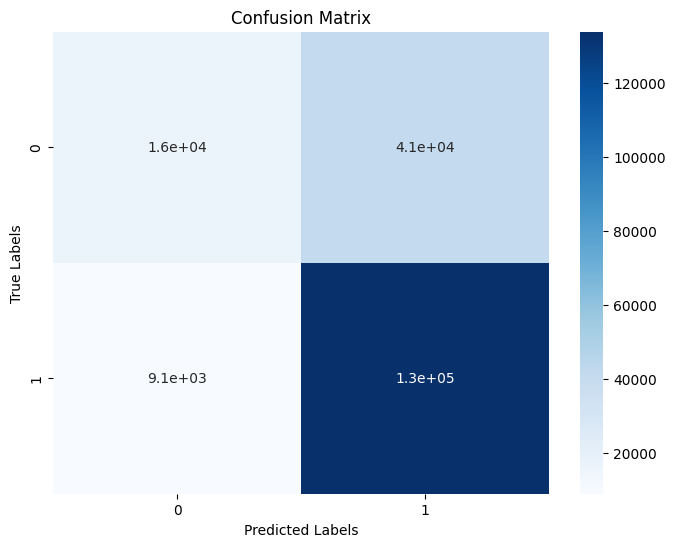

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# create heatmap of confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

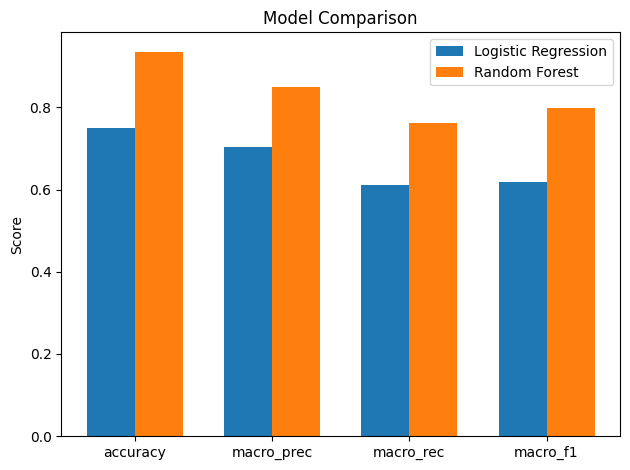

In [22]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['accuracy', 'macro_prec', 'macro_rec', 'macro_f1'] # replace with your own list of labels
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, logistic_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rfc_scores, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()
